In [1]:
import numpy as np
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input, decode_predictions
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
from IPython import display
import warnings
warnings.filterwarnings("ignore")

path_to_dir = "./LabeledFacesInTheWild/"

Using TensorFlow backend.


In [2]:
def get_face(path_to_img, path_to_dir=path_to_dir):
    """
    Extracts face from the image.
    """
    
    pxl = plt.imread(full_path)
    
    detector = MTCNN()
    results = detector.detect_faces(pxl)
    
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height

    face = pixels[y1:y2, x1:x2]
    
    image = Image.fromarray(face)
    image = image.resize((224, 224))
    face_array = np.asarray(image)
    
    return face_array

In [3]:
path_to_img = "Johnny_Depp/Johnny_Depp_0002.jpg"
full_path = path_to_dir + path_to_img

pixels = plt.imread(full_path)

### This is the full image of the person we trying to recognize.

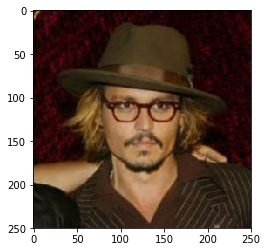

In [4]:
plt.imshow(pixels)

### And this is the cropped face of the person.

W0716 10:41:36.256149 140663784806208 deprecation_wrapper.py:119] From /home/dmkirichen/anaconda3/lib/python3.7/site-packages/mtcnn/mtcnn.py:187: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0716 10:41:36.271427 140663784806208 deprecation_wrapper.py:119] From /home/dmkirichen/anaconda3/lib/python3.7/site-packages/mtcnn/mtcnn.py:193: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0716 10:41:36.297368 140663784806208 deprecation_wrapper.py:119] From /home/dmkirichen/anaconda3/lib/python3.7/site-packages/mtcnn/network.py:43: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0716 10:41:36.298567 140663784806208 deprecation_wrapper.py:119] From /home/dmkirichen/anaconda3/lib/python3.7/site-packages/mtcnn/layer_factory.py:88: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 10:41:36.302159 140663784806208 deprecation_wrapper.py:119] From

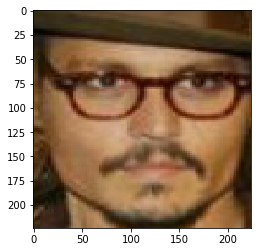

In [5]:
face_array = get_face(path_to_img)
plt.imshow(face_array)

### Now we can recognize this face, using pretrained weights of VGG-Face model.

In [6]:
pixels = face_array.astype('float32')
samples = np.expand_dims(pixels, axis=0)
# prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples, version=2)
# create a vggface model
model = VGGFace(model='resnet50')
# perform prediction
yhat = model.predict(samples)
# convert prediction into names
results = decode_predictions(yhat)
# display most likely results
for result in results[0]:
    print('%s: %.3f%%' % (result[0], result[1]*100))

W0716 10:41:37.896986 140663784806208 deprecation_wrapper.py:119] From /home/dmkirichen/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0716 10:41:42.327024 140663784806208 deprecation_wrapper.py:119] From /home/dmkirichen/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3980: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.



b' Johnny_Depp': 97.836%
b' Clay_Buchholz': 0.411%
b' Clayne_Crawford': 0.305%
b' Justin_Chambers': 0.082%
b' Al_Murray': 0.059%
